<a href="https://colab.research.google.com/github/yomnadahab770/FinalNtiProject/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from sklearn.metrics import confusion_matrix
from PIL import Image
from google.colab import files

# **Dataset**

In [2]:
(x_train , y_train),(x_test , y_test)= keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)


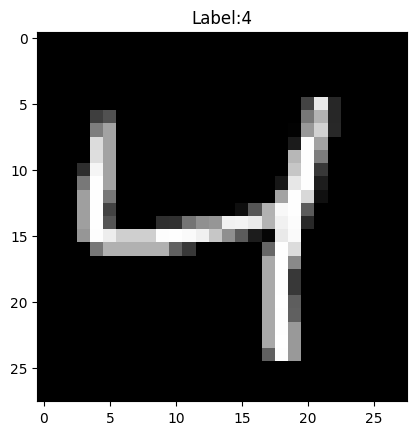

In [4]:
plt.imshow(x_train[2],cmap="gray")
plt.title(f"Label:{y_train[2]}")
plt.show()

# **Preprocessing**

In [5]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [6]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [7]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape)

(60000, 28, 28, 1)


# **Model building**

In [8]:
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

# **Model training**

In [9]:
batch_size = 128
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7562 - loss: 0.7761 - val_accuracy: 0.9742 - val_loss: 0.0875
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9629 - loss: 0.1241 - val_accuracy: 0.9847 - val_loss: 0.0574
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9732 - loss: 0.0882 - val_accuracy: 0.9872 - val_loss: 0.0480
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9777 - loss: 0.0737 - val_accuracy: 0.9905 - val_loss: 0.0386
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9812 - loss: 0.0640 - val_accuracy: 0.9905 - val_loss: 0.0372
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9825 - loss: 0.0547 - val_accuracy: 0.9898 - val_loss: 0.0363
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9834 - loss: 0.0511 - val_accuracy: 0.9913 - val_loss: 0.0331
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9851 - loss: 0.0478 - val_accuracy: 0

# **Model test**

In [10]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss: ",score[0])
print("Test accuracy: ",score[1])

Test loss:  0.026515113189816475
Test accuracy:  0.9908999800682068


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


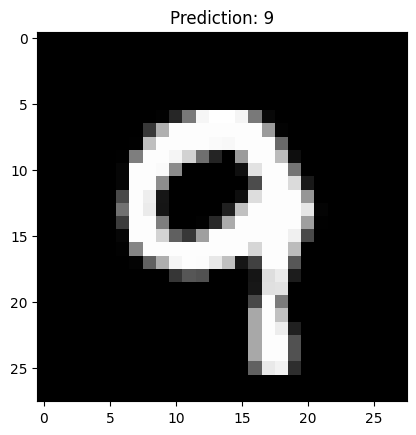

In [11]:
image_index= 99
test_image=x_test[image_index]
prediction=model.predict(np.expand_dims(test_image,axis=0))
prediction_number=np.argmax(prediction)
plt.imshow(test_image.reshape(28,28),cmap="gray")
plt.title(f"Prediction: {prediction_number}")
plt.show()

In [12]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# **Confusion Matrix**

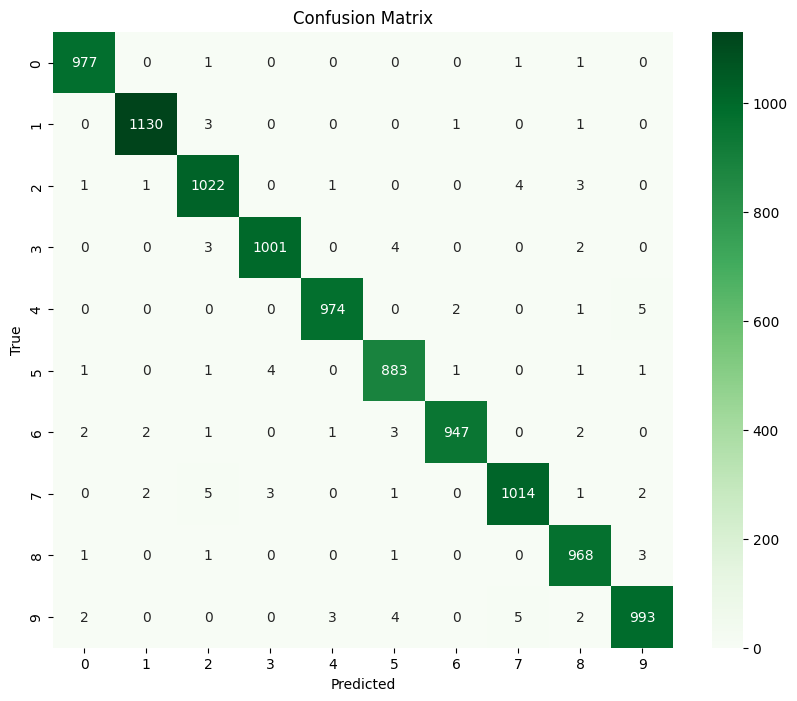

In [13]:
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Model Errors**

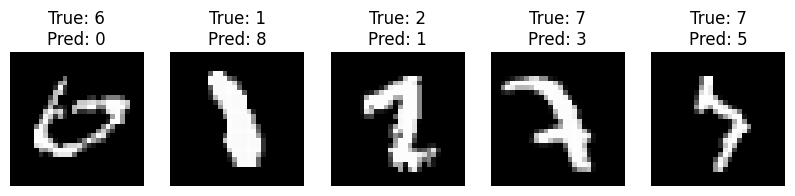

In [14]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test_errors[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true_errors[i]}\nPred: {y_pred_classes_errors[i]}")
    plt.axis('off')
plt.show()

# **Custom Image**

Predicted label: 3
Confidence: 96.74%
Best preprocessing option: 3 (0-3: thresholds)


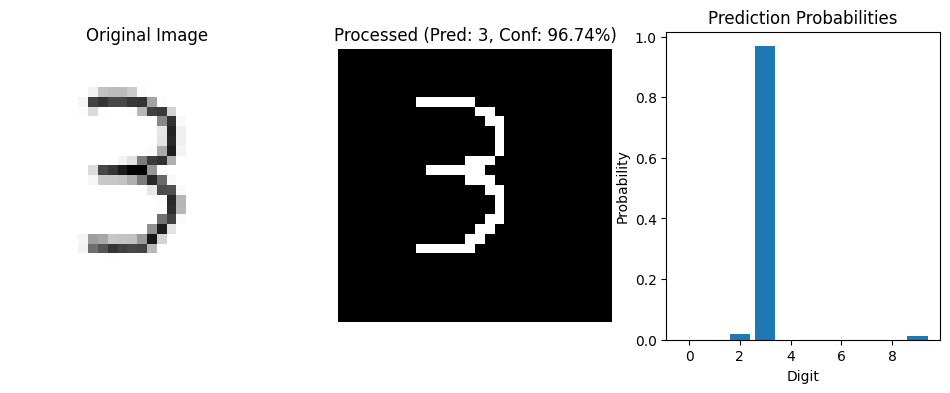

Model Test Accuracy: 99.09%


In [17]:
def enhanced_preprocess_custom_image(image_path_or_pil_image):
    if isinstance(image_path_or_pil_image, str):
        image = Image.open(image_path_or_pil_image).convert("L")
    else:
        image = image_path_or_pil_image.convert("L")

    image = image.resize((28, 28))
    image_arr = np.array(image).astype("float32") / 255.0

    options = []

    thresh1 = np.where(image_arr > 0.5, 1.0, 0.0)
    options.append(thresh1)

    inverted = 1 - image_arr
    thresh2 = np.where(inverted > 0.5, 1.0, 0.0)
    options.append(thresh2)

    hist, bins = np.histogram(image_arr.flatten(), bins=256, range=(0,1))
    bins = (bins[:-1] + bins[1:]) / 2
    total = image_arr.size
    cumsum = np.cumsum(hist)
    cumsum_mean = np.cumsum(hist * bins)

    bg_mean = cumsum_mean / np.maximum(cumsum, 1e-6)
    fg_mean = (cumsum_mean[-1] - cumsum_mean) / np.maximum(total - cumsum, 1e-6)
    between_var = cumsum * (total - cumsum) * (bg_mean - fg_mean)**2
    otsu_thresh = bins[np.argmax(between_var)]
    thresh3 = np.where(image_arr > otsu_thresh, 1.0, 0.0)
    options.append(thresh3)

    otsu_thresh_inv = 1 - otsu_thresh
    thresh4 = np.where(inverted > otsu_thresh_inv, 1.0, 0.0)
    options.append(thresh4)

    best_option_idx = 0
    best_conf = 0
    best_processed = options[0]

    for i, opt in enumerate(options):
        proc = np.expand_dims(np.expand_dims(opt, 0), -1)
        pred = model.predict(proc, verbose=0)
        conf = np.max(pred)
        if conf > best_conf:
            best_conf = conf
            best_option_idx = i
            best_processed = proc

    original_image = image

    return best_processed, original_image, best_conf, best_option_idx

image_path = "/content/333.png"

processed_image, original_image, confidence, best_opt = enhanced_preprocess_custom_image(image_path)
prediction = model.predict(processed_image, verbose=0)
predicted_label = np.argmax(prediction)
print(f"Predicted label: {predicted_label}")
print(f"Confidence: {confidence:.2%}")
print(f"Best preprocessing option: {best_opt} (0-3: thresholds)")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

processed_display = processed_image[0, :, :, 0]
axes[1].imshow(processed_display, cmap='gray')
axes[1].set_title(f"Processed (Pred: {predicted_label}, Conf: {confidence:.2%})")
axes[1].axis('off')

axes[2].bar(range(10), prediction[0])
axes[2].set_title("Prediction Probabilities")
axes[2].set_xlabel("Digit")
axes[2].set_ylabel("Probability")
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print(f"Model Test Accuracy: {score[1]:.2%}")

# **Performance analysis**

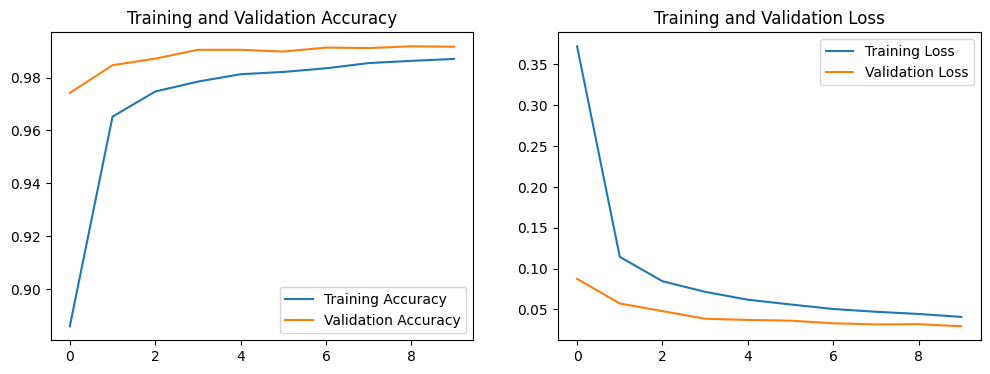

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Upload Image**

Upload a new image of the number (colored or grayscale):


Saving 23232.png to 23232.png

--- As a result of: 23232.png ---
Predicted Number: 2
Confidence: 99.98%
Best option: 3
All probabilities: [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.]


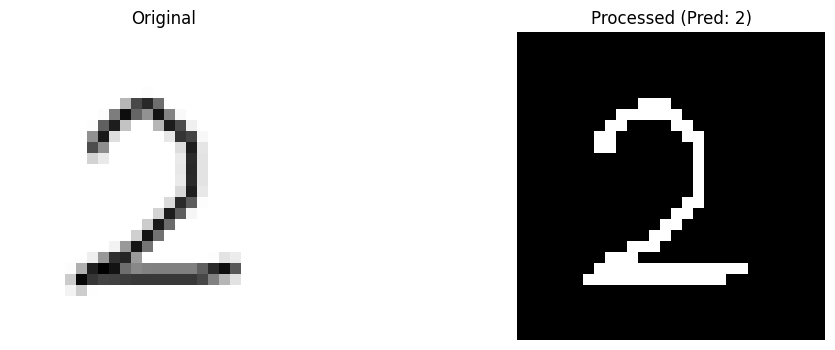

In [20]:
print("Upload a new image of the number (colored or grayscale):")
uploaded = files.upload()

for filename in uploaded.keys():
    processed_image, original_image, confidence, best_opt = enhanced_preprocess_custom_image(filename)
    prediction = model.predict(processed_image, verbose=0)
    predicted_label = np.argmax(prediction)

    print(f"\n--- As a result of: {filename} ---")
    print(f"Predicted Number: {predicted_label}")
    print(f"Confidence: {confidence:.2%}")
    print(f"Best option: {best_opt}")
    print("All probabilities:", np.round(prediction[0] * 100, 1))
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].imshow(original_image, cmap="gray")
    axes[0].set_title("Original")
    axes[0].axis('off')
    processed_display = processed_image[0, :, :, 0]
    axes[1].imshow(processed_display, cmap='gray')
    axes[1].set_title(f"Processed (Pred: {predicted_label})")
    axes[1].axis('off')
    plt.show()

## **Feature Maps Visualization**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
frist layer (1, 26, 26, 32)


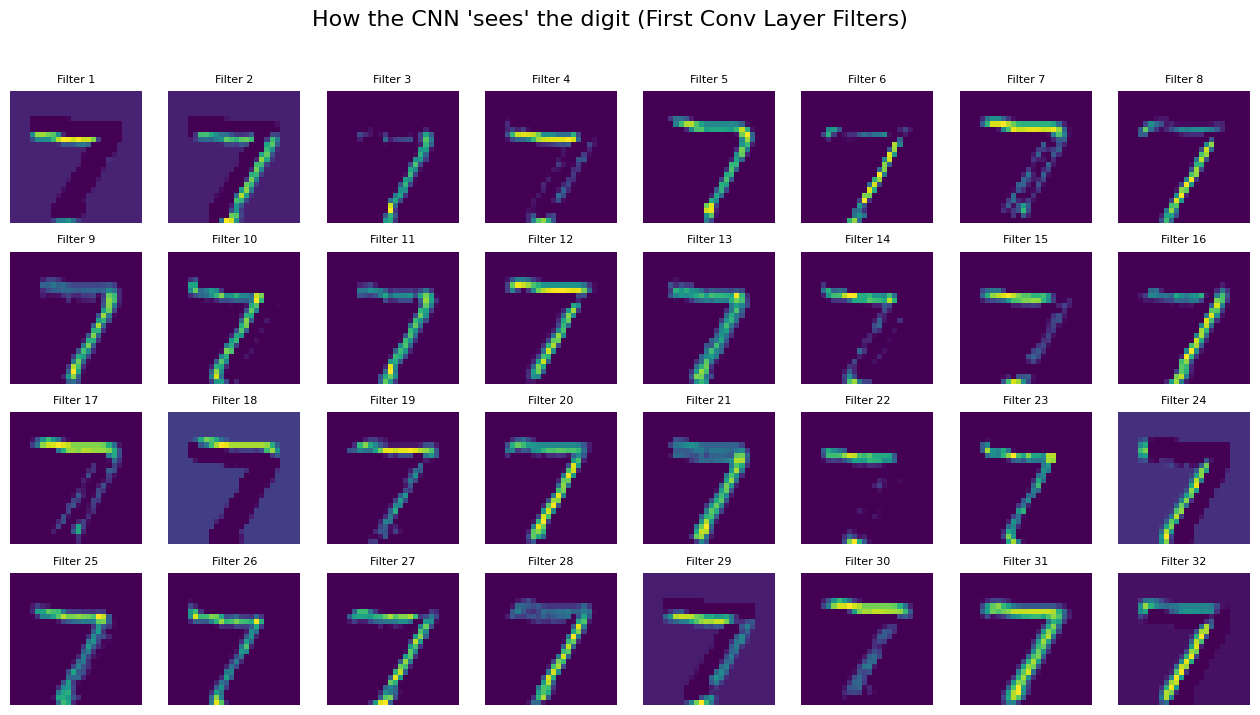

In [23]:

layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = Model(inputs=model.inputs[0], outputs=layer_outputs)

img = x_test[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(img)

first_layer_activation = activations[0]
print(f"frist layer {first_layer_activation.shape}")

plt.figure(figsize=(16, 8))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f'Filter {i+1}', fontsize=8)

plt.suptitle("How the CNN 'sees' the digit (First Conv Layer Filters)", fontsize=16)
plt.show()

## **Show filter of digite**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


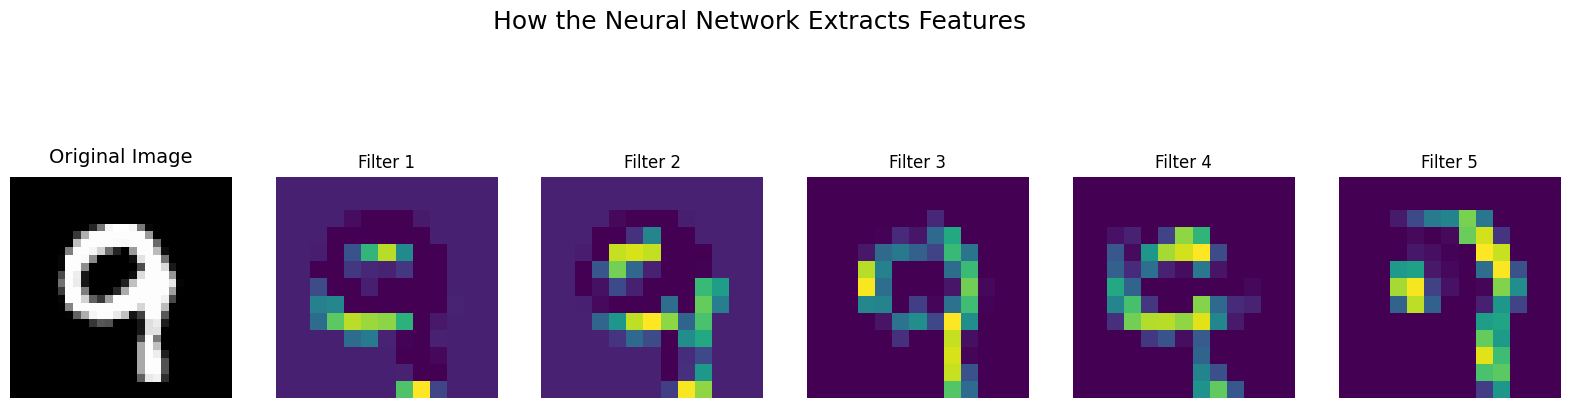

In [26]:
img_to_visualize = x_test[image_index]

layer_outputs = [model.layers[1].output]
activation_model = Model(inputs=model.inputs[0], outputs=layer_outputs)
activations = activation_model.predict(img_to_visualize.reshape(1,28,28,1))

fig, axes = plt.subplots(1, 6, figsize=(20, 5))

axes[0].imshow(img_to_visualize.reshape(28,28), cmap='gray')
axes[0].set_title("Original Image", fontsize=14, pad=10)
axes[0].axis('off')

for i in range(5):
    axes[i+1].imshow(activations[0, :, :, i], cmap='viridis')
    axes[i+1].set_title(f"Filter {i+1}", fontsize=12)
    axes[i+1].axis('off')

plt.suptitle("How the Neural Network Extracts Features", fontsize=18, y=1.05)
plt.show()

# **Save Model**

In [19]:
model.save('my_mnist_model.h5')
print("The model has been successfully saved! You can find it in your colab files now.")

The model has been successfully saved! You can find it in your colab files now.
